In [ ]:
"https://drive.google.com/file/d/1S4h9oEtd-OEN2kU-07bIl7FGBuwYASe6/view?usp=sharing"

'https://drive.google.com/file/d/1S4h9oEtd-OEN2kU-07bIl7FGBuwYASe6/view?usp=sharing'

In [ ]:
! gdown 1S4h9oEtd-OEN2kU-07bIl7FGBuwYASe6

Downloading...
From: https://drive.google.com/uc?id=1S4h9oEtd-OEN2kU-07bIl7FGBuwYASe6
To: /content/pregnancy.csv
100% 60.0k/60.0k [00:00<00:00, 55.6MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/pregnancy.csv')

In [ ]:
# Pregnancy test results: y_true - the real state of person (correct answer), y_pred1 - first pregnancy test result, y_pred2 - second pregnancy test result
# Task: which pregnancy test is more effective
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


In [ ]:
len(df)

10000

In [ ]:
# Calculating the persentage of errors for the first test

In [ ]:
df[df['y_true'] != df['y_pred1']]

,y_true,y_pred1,y_pred2
3,0,1,0
39,0,1,0
42,0,1,0
79,0,1,0
92,0,1,0
...,...,...,...
9925,0,1,0
9971,0,1,0
9987,0,1,0
9993,0,1,0


In [ ]:
# 1 method
len(df[df['y_true'] != df['y_pred1']]) / len(df)

0.05

In [ ]:
# 2 method
(df['y_true'] != df['y_pred1']).mean()

0.05

In [ ]:
# Calculating the persentage of errors for the second test

In [ ]:
df[df['y_true'] != df['y_pred1']]

,y_true,y_pred1,y_pred2
3,0,1,0
39,0,1,0
42,0,1,0
79,0,1,0
92,0,1,0
...,...,...,...
9925,0,1,0
9971,0,1,0
9987,0,1,0
9993,0,1,0


In [ ]:
# 1 method
len(df[df['y_true'] != df['y_pred2']]) / len(df)

0.05

In [ ]:
# 2 method
(df['y_true'] != df['y_pred2']).mean()

0.05

In [ ]:
# Accuracy calculation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(df['y_true'], df['y_pred1'])

0.95

In [ ]:
accuracy_score(df['y_true'], df['y_pred2'])

0.95

In [ ]:
#  Positive and negative

In [ ]:
df['y_true'] ==1

,y_true
0,False
1,True
2,True
3,False
4,True
...,...
9995,False
9996,True
9997,False
9998,True


In [ ]:
positives = df[df['y_true'] ==1].copy()
positives.head(3)

,y_true,y_pred1,y_pred2
1,1,1,1
2,1,1,1
4,1,1,1


In [ ]:
negatives = df[df['y_true'] ==0].copy()
negatives.head(3)

,y_true,y_pred1,y_pred2
0,0,0,0
3,0,1,0
11,0,0,0


In [ ]:
# persentage of errors on sick people in the first test / False Negative Rate
len(positives[positives['y_true'] != positives['y_pred1']]) / len(positives)
# or
FNR1 = (positives['y_true'] != positives['y_pred1']).mean()
FNR1

0.00983284169124877

In [ ]:
# persentage of errors on sick people in the second test / False Negative Rate
len(positives[positives['y_true'] != positives['y_pred2']]) / len(positives)
# or
FNR2 = (positives['y_true'] != positives['y_pred2']).mean()
FNR2

0.049164208456243856

In [ ]:
# persentage of errors on healthy people in the first test / False Positive Rate
len(negatives[negatives['y_true'] != negatives['y_pred1']]) / len(negatives)
# or
FPR1 = (negatives['y_true'] != negatives['y_pred1']).mean()
FPR1

0.09155645981688708

In [ ]:
# persentage of errors on healthy people in the second test / False Positive Rate
len(negatives[negatives['y_true'] != negatives['y_pred2']]) / len(negatives)
# or
FPR2 = (negatives['y_true'] != negatives['y_pred2']).mean()
FPR2

0.0508646998982706

In [ ]:
# Sensitivity and specificity calculation

In [ ]:
#  Sensitivity 1 test
TPR1 = 1 - FNR1
# or
accuracy_score(positives['y_true'], positives['y_pred1'])

0.9901671583087512

In [ ]:
#  Sensitivity 2 test
TPR2 = 1 - FNR2
# or
accuracy_score(positives['y_true'], positives['y_pred2'])

0.9508357915437562

In [ ]:
# Specificity 1 test
TNR1 = 1 - FPR1
# or
accuracy_score(negatives['y_true'], negatives['y_pred1'])

0.9084435401831129

In [ ]:
# Specificity 2 test
TNR2 = 1 - FPR2
# or
accuracy_score(negatives['y_true'], negatives['y_pred2'])

0.9491353001017294

In [ ]:
# calculating Sensitivity and Specificity by function

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Sensitivity

In [ ]:
recall_score(positives['y_true'], positives['y_pred1'])

0.9901671583087512

In [ ]:
recall_score(positives['y_true'], positives['y_pred2'])

0.9508357915437562

In [ ]:
# Specificity

In [ ]:
recall_score(negatives['y_true'], negatives['y_pred1'], pos_label=0)

0.9084435401831129

In [ ]:
recall_score(negatives['y_true'], negatives['y_pred2'], pos_label=0)

0.9491353001017294

In [ ]:
# CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 1.test

In [ ]:
cm = confusion_matrix(df['y_true'], df['y_pred1'])
cm

array([[4465,  450],
       [  50, 5035]])

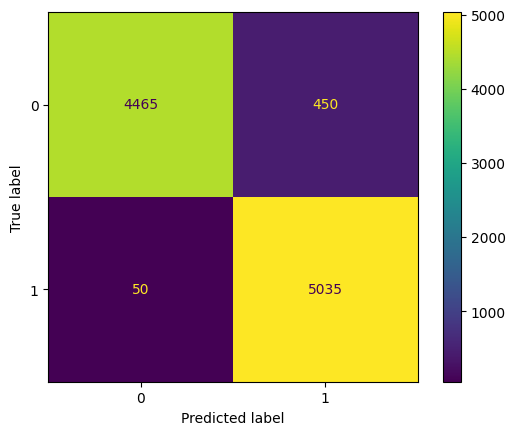

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
confusion_matrix(df['y_true'], df['y_pred1'])

array([[4465,  450],
       [  50, 5035]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred1']).ravel()

In [ ]:
tn, fp, fn, tp

(4465, 450, 50, 5035)

In [ ]:
# 2. test

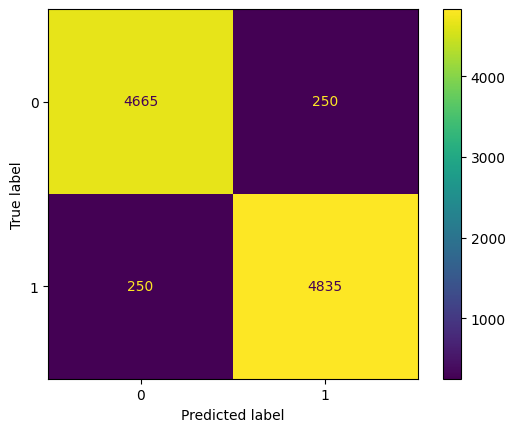

In [ ]:
cm = confusion_matrix(df['y_true'], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
confusion_matrix(df['y_true'], df['y_pred2'])

array([[4665,  250],
       [ 250, 4835]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(df['y_true'], df['y_pred2']).ravel()
tn, fp, fn, tp

(4665, 250, 250, 4835)

In [ ]:
# Reseach outcome
# General conclusion:
# Test 1 is better at detecting pregnancy (less likely to be wrong when there is a pregnancy).
# Test 2 is better at showing that there is no pregnancy (less likely to be wrong when there really is no pregnancy).

# If the priority is not to miss a pregnancy, then Test 1 is preferable.
# If it is important to avoid false positives (errors when the test says there is a pregnancy, but there is none), it is better to choose Test 2

#  But still, it may be more important not to miss a pregnancy when it is, in order to react in time, change your lifestyle, and so on from this point of view. Still, test number 1 can be better.